### 2016 ~ 2020년도 서울시 1인 가구 데이터 수집 및 전처리

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import re
import math
from matplotlib import cm
import sys                                               ## 파이썬 엔진에 대한 정보를 관리하는 모듈을 사용한다. 
from matplotlib import font_manager, rc                  ## 폰트를 관리하는 함수와 설정 함수를 사용한다.

if sys.platform  == 'darwin':                             ## MAC OS의 이름을 확인한다.
    path = '.....'  
elif sys.platform == 'win32':                             ## Windows 이름을 확인한다.
    # path = "font/THEdog.ttf"
    path = "C:\\ph\\PYDATAexam\\font\\MaplestoryBold.ttf"
    # path = "font/HoonWhitecatR.ttf"
    # path = "font/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()        ##  폰트가 있는지를 확인한다. 
rc('font', family=font_name)                                          ## 한글 폰트를 시각화 환경에 세팅한다.
print(font_name)
plt.rcParams['axes.unicode_minus'] = False                            # rcParams = 전역적으로 설정을 바꾼다. "axes.unicode_minus" = 음의 값 -의 폰트를 잘 읽을 수 있도록

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\ph\\PYDATAexam\\font\\MaplestoryBold.ttf'

In [ ]:
onegagu = pd.read_csv("C:/Users/dlagh/Desktop/서울시1인가구_시군구별.csv", encoding="utf-8", index_col=0)
onegagu.head()
onegagu.drop(0, inplace=True)
onegagu.set_index(["행정구역별(시군구)", "성별"], inplace=True)
column_0 = ["2016", "2017", "2018", "2019", "2020"]
column_1 = ['1인가구', '주택_계', '주택_단독주택', '주택_아파트', '주택_연립주택',
           '주택_다세대주택', '주택_비거주용건물내 주택', '주택이외의 거처_계']
group_index = onegagu.groupby(["행정구역별(시군구)", "성별"])
column = pd.MultiIndex.from_product([[i for i in column_0], column_1], names=["년도", "거처종류"])
onegagu.columns = column

In [ ]:
onegagu

년도                2016                                                         \
거처종류              1인가구    주택_계 주택_단독주택  주택_아파트 주택_연립주택 주택_다세대주택 주택_비거주용건물내 주택   
행정구역별(시군구) 성별                                                                   
서울특별시      계   1138860  989460  515463  240673   17518   174169         41637   
           남자   544607  464271  262455   93565    7190    78343         22718   
           여자   594253  525189  253008  147108   10328    95826         18919   
종로구        계     22835   18970   11376    2588     877     3326           803   
           남자    11185    8876    5590    1137     322     1424           403   
...                ...     ...     ...     ...     ...      ...           ...   
송파구        남자    24833   21431    8402    4301     212     7564           952   
           여자    29576   26639    8309    7359     372     9771           828   
강동구        계     39469   34876   18568    8131     342     6565          1270   
           남자    19318   16738    9678    3211     137     2987           725   
           여자    20151   18138    8890    4920     205     3578           545   

년도                           2017           ...          2019             \
거처종류          주택이외의 거처_계     1인가구     주택_계  ... 주택_비거주용건물내 주택 주택이외의 거처_계   
행정구역별(시군구) 성별                               ...                            
서울특별시      계      149400  1180540  1009881  ...         45272     199727   
           남자      80336   561524   470459  ...         24634     101940   
           여자      69064   619016   539422  ...         20638      97787   
종로구        계        3865    23638    19260  ...           925       4653   
           남자       2309    11594     9013  ...           443       2636   
...                  ...      ...      ...  ...           ...        ...   
송파구        남자       3402    26901    22095  ...          1088       5927   
           여자       2937    31947    27607  ...           874       6528   
강동구        계        4593    41050    35917  ...          1407       5672   
           남자       2580    20064    17173  ...           767       2977   
           여자       2013    20986    18744  ...           640       2695   

년도                2020                                            \
거처종류              1인가구     주택_계 주택_단독주택  주택_아파트 주택_연립주택 주택_다세대주택   
행정구역별(시군구) 성별                                                      
서울특별시      계   1390701  1163690  536654  311112   21613   250810   
           남자   650999   536424  274574  118308    8971   111069   
           여자   739702   627266  262080  192804   12642   139741   
종로구        계     25983    20750   11208    3691    1009     3993   
           남자    12663     9674    5611    1514     397     1696   
...                ...      ...     ...     ...     ...      ...   
송파구        남자    32890    26276    8672    5275     326    10871   
           여자    40804    33221    8180    9662     494    13981   
강동구        계     50316    43827   19183   11869     381    11003   
           남자    23817    20442   10120    4576     146     4869   
           여자    26499    23385    9063    7293     235     6134   

년도                                      
거처종류          주택_비거주용건물내 주택 주택이외의 거처_계  
행정구역별(시군구) 성별                           
서울특별시      계          43501     227011  
           남자         23502     114575  
           여자         19999     112436  
종로구        계            849       5233  
           남자           456       2989  
...                     ...        ...  
송파구        남자          1132       6614  
           여자           904       7583  
강동구        계           1391       6489  
           남자           731       3375  
           여자           660       3114  

[78 rows x 40 columns]

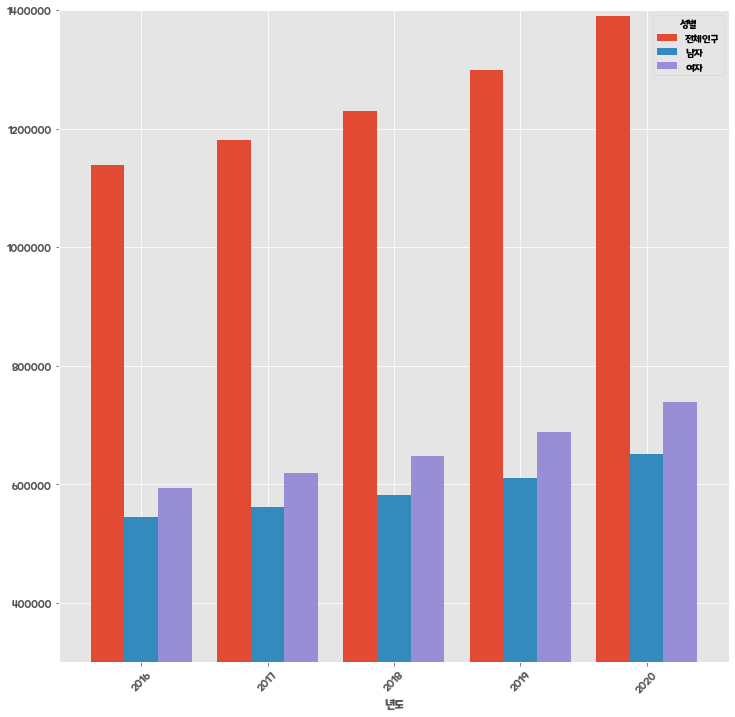

In [ ]:
onegagu = onegagu.astype(int)
seoul_one = onegagu.loc["서울특별시"].xs("1인가구", level = 1, axis = 1)
seoul_one.rename({"계": "전체인구", "남자": "남자", "여자": "여자"}, inplace = True)
plt.style.use("ggplot")
plt.figure(figsize = (12, 12))
ax1 =plt.subplot(1, 1, 1)
plot_ax = seoul_one.T.plot(kind = "bar",
                width = 0.8,
                ax = ax1)
plot_ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation = 45)
plt.ylim(bottom = 300000, top = 1400000)
plt.show()

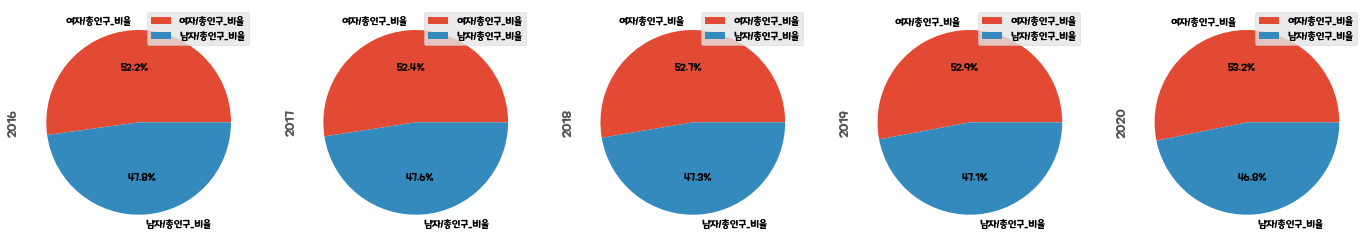

In [ ]:
seoul_one_womanratio = [n for n in seoul_one.loc["여자"].values / seoul_one.loc["전체인구"].values * 100]
seoul_one_manratio = [n for n in seoul_one.loc["남자"].values / seoul_one.loc["전체인구"].values * 100]
df = pd.DataFrame(seoul_one_womanratio, columns=["여자/총인구_비율"], index=["2016", "2017", "2018", "2019", "2020"])
df["남자/총인구_비율"] = seoul_one_manratio
df.T.plot(kind = "pie",
        subplots = True,
        figsize = (24, 12),
        autopct = "%.1f%%")
plt.show()

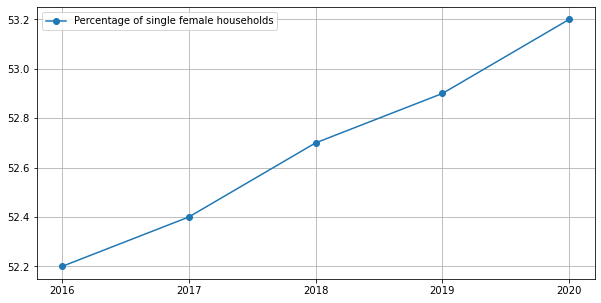

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))

lang_list = ['2016', '2017', '2018', '2019', '2020']
plt.plot(lang_list, [52.2, 52.4, 52.7, 52.9, 53.2], marker='o')

plt.legend(['Percentage of single female households'])

plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
years = pd.date_range('2016','2021', freq='AS')
years


DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01'],
              dtype='datetime64[ns]', length=1828, freq='D')

In [4]:
import pandas as pd
householdes= pd.read_csv('data/서울시1인가구_시군구별.csv')
householdes.head(2)

,Unnamed: 0,행정구역별(시군구),성별,2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,...,2019.6,2019.7,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7
0,0,행정구역별(시군구),성별,1인가구,주택_계,주택_단독주택,주택_아파트,주택_연립주택,주택_다세대주택,주택_비거주용건물내 주택,...,주택_비거주용건물내 주택,주택이외의 거처_계,1인가구,주택_계,주택_단독주택,주택_아파트,주택_연립주택,주택_다세대주택,주택_비거주용건물내 주택,주택이외의 거처_계
1,1,서울특별시,계,1138860,989460,515463,240673,17518,174169,41637,...,45272,199727,1390701,1163690,536654,311112,21613,250810,43501,227011


In [5]:
householdes.columns=['Unnamed: 0','행정구역별(시군구)', '성별', '1인가구', '주택_계', '주택_단독주택', '주택_아파트',
       '주택_연립주택', '주택_다세대주택', '주택_비거주용건물내 주택', '주택이외의 거처_계', '1인가구',
       '주택_계', '주택_단독주택', '주택_아파트', '주택_연립주택', '주택_다세대주택',
       '주택_비거주용건물내 주택', '주택이외의 거처_계', '1인가구', '주택_계', '주택_단독주택', '주택_아파트',
       '주택_연립주택', '주택_다세대주택', '주택_비거주용건물내 주택', '주택이외의 거처_계', '1인가구',
       '주택_계', '주택_단독주택', '주택_아파트', '주택_연립주택', '주택_다세대주택',
       '주택_비거주용건물내 주택', '주택이외의 거처_계', '1인가구', '주택_계', '주택_단독주택', '주택_아파트',
       '주택_연립주택', '주택_다세대주택', '주택_비거주용건물내 주택', '주택이외의 거처_계']

householdes=householdes["1인가구"]
householdes

,1인가구,1인가구,1인가구,1인가구,1인가구
0,1인가구,1인가구,1인가구,1인가구,1인가구
1,1138860,1180540,1229421,1299787,1390701
2,544607,561524,581944,611561,650999
3,594253,619016,647477,688226,739702
4,22835,23638,25326,24671,25983
...,...,...,...,...,...
74,24833,26901,28740,31036,32890
75,29576,31947,34711,37825,40804
76,39469,41050,42126,45188,50316
77,19318,20064,20404,21674,23817


In [6]:
householdes.columns=['2016','2017','2018','2019','2020']
householdes=householdes.drop(0)
householdes=householdes.iloc[:3]
householdes=householdes.astype(int)
householdes

,2016,2017,2018,2019,2020
1,1138860,1180540,1229421,1299787,1390701
2,544607,561524,581944,611561,650999
3,594253,619016,647477,688226,739702


In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline
def predict(df, year):
    X = np.array(range(2016, 2021))
    X = sm.add_constant(X)
    n,m = df.shape
    l = []
    for i in range(0, n):
        y = df.iloc[i, :].values
        est = sm.OLS(y, X).fit()
        l.append(float(est.predict(np.array([1, year]))))
    return pd.Series(l, index=df.index)

population_predict = householdes.copy()
population_predict['2021'] = predict(householdes, 2021)
population_predict['2022'] = predict(householdes, 2022)
population_predict['2023'] = predict(householdes, 2023)
population_predict['2024'] = predict(householdes, 2024)
population_predict['2025'] = predict(householdes, 2025)


population_predict

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
1,1138860,1180540,1229421,1299787,1390701,1434740.5,1497033.4,1559326.3,1621619.2,1683912.1
2,544607,561524,581944,611561,650999,668973.3,695255.4,721537.5,747819.6,774101.7
3,594253,619016,647477,688226,739702,765767.2,801778.0,837788.8,873799.6,909810.4


In [8]:
population_predict=population_predict.iloc[:3]
population_predict=population_predict.transpose()
population_predict.columns=['총','남자','여자']
population_predict

,총,남자,여자
2016,1138860.0,544607.0,594253.0
2017,1180540.0,561524.0,619016.0
2018,1229421.0,581944.0,647477.0
2019,1299787.0,611561.0,688226.0
2020,1390701.0,650999.0,739702.0
2021,1434740.5,668973.3,765767.2
2022,1497033.4,695255.4,801778.0
2023,1559326.3,721537.5,837788.8
2024,1621619.2,747819.6,873799.6
2025,1683912.1,774101.7,909810.4


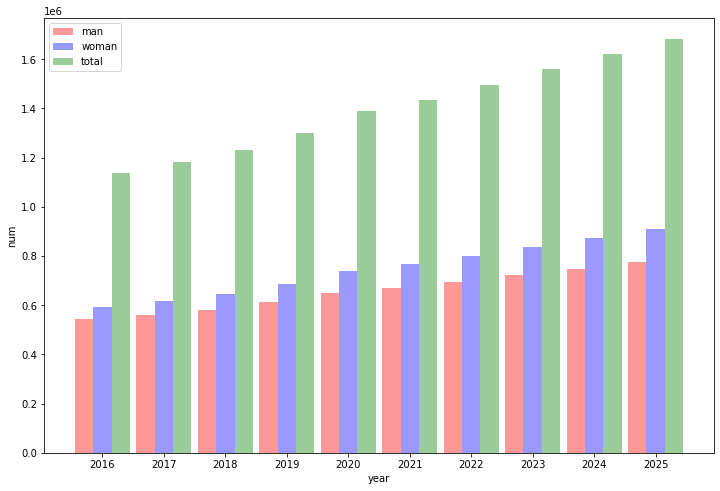

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,8))
bar_width = 0.3

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(10)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, population_predict['남자'], bar_width, alpha=0.4, color='red', label='man')

b2 = plt.bar(index + bar_width,population_predict['여자'], bar_width, alpha=0.4, color='blue', label='woman')

b3 = plt.bar(index + 2 * bar_width, population_predict['총'], bar_width, alpha=0.4, color='green', label='total')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭


plt.xticks(np.arange(bar_width, 10 + bar_width), population_predict.index)


# x축, y축 이름 및 범례 설정
plt.xlabel('year')
plt.ylabel('num')

plt.legend()
plt.show()